In [1]:
import os,sys

import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

Using TensorFlow backend.


In [2]:
df = pd.read_csv("../data/exT.csv",low_memory=False)
print(df.shape)
df.head()

(15965, 19103)


,Unnamed: 0,RAB4B,TIGAR,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,OR8D4
0,Liver.1,2.367912,0.698684,3.931116,0.000000,116.288461,13.839265,0.021383,14.722173,5.437620,...,0.000000,1.199607,0.101155,1.428458,2.471339,0.042357,44.610061,6.394772,0.281878,0.0
1,Kidney.1,26.299800,2.498500,0.255600,14.944300,2.049600,3.262300,0.146400,14.132900,3.323600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Prostate.1,5.592506,2.953563,7.065690,0.012499,325.521932,22.144552,0.356845,28.899361,6.717593,...,0.030674,2.062158,0.185503,8.414909,2.690346,0.688731,0.260365,9.792451,1.671371,0.0
3,Kidney.2,21.554200,1.334700,1.095300,23.476800,8.741300,11.491700,0.945500,32.975700,6.187900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Kidney.3,22.820100,2.640900,3.750800,29.774900,7.595200,15.186900,0.482000,19.233800,8.741800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [3]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15965 entries, 0 to 15964
Columns: 19103 entries, Unnamed: 0 to OR8D4
dtypes: float64(19099), int64(3), object(1)
memory usage: 2.3+ GB


In [4]:
df = df.rename(columns={'Unnamed: 0':'labels'})
df.head()

,labels,RAB4B,TIGAR,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,OR8D4
0,Liver.1,2.367912,0.698684,3.931116,0.000000,116.288461,13.839265,0.021383,14.722173,5.437620,...,0.000000,1.199607,0.101155,1.428458,2.471339,0.042357,44.610061,6.394772,0.281878,0.0
1,Kidney.1,26.299800,2.498500,0.255600,14.944300,2.049600,3.262300,0.146400,14.132900,3.323600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,Prostate.1,5.592506,2.953563,7.065690,0.012499,325.521932,22.144552,0.356845,28.899361,6.717593,...,0.030674,2.062158,0.185503,8.414909,2.690346,0.688731,0.260365,9.792451,1.671371,0.0
3,Kidney.2,21.554200,1.334700,1.095300,23.476800,8.741300,11.491700,0.945500,32.975700,6.187900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Kidney.3,22.820100,2.640900,3.750800,29.774900,7.595200,15.186900,0.482000,19.233800,8.741800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [5]:
# df.describe() # not so helpful because of 19k features

## FPKM Load

In [51]:
fpkm_df = pd.read_csv("../data/FPKM_gene_counts_FPKM.csv")
fpkm_df.head()

,Unnamed: 0,D0 Rep1,D0 Rep2,D0 Rep3,Unnamed: 4,D7 Rep1,D7 Rep2,D7 Rep3,Unnamed: 8,D13 Rep1,D13 Rep2,D13 Rep3,Unnamed: 12,D18 Rep1,D18 Rep2,D18 Rep3,Unnamed: 16,D28 Rep1,D28 Rep2,D28 Rep3
0,gene-MIR6859-1,0.000000,1.638304,0.000000,NaN,1.909625,3.125239,7.916809,NaN,0.000000,5.476164,0.000000,NaN,4.312032,0.000000,2.429304,NaN,0.000000,0.000000,0.000000
1,gene-LOC100996442,0.107611,0.066212,0.061441,NaN,0.056791,0.075665,0.068419,NaN,0.054406,0.068901,0.049966,NaN,0.076175,0.074198,0.064836,NaN,0.065475,0.035969,0.079663
2,gene-LOC112268260,0.000000,0.000000,0.001060,NaN,0.012356,0.005898,0.011383,NaN,0.003206,0.004429,0.003533,NaN,0.008525,0.004446,0.005894,NaN,0.004026,0.005652,0.006008
3,gene-LOC100132287,0.000000,0.118768,0.142466,NaN,0.359938,0.362501,0.267832,NaN,0.086205,0.198496,0.456018,NaN,0.375119,0.310851,0.264167,NaN,0.054128,0.000000,0.242352
4,gene-LOC105378947,0.000000,0.044542,0.048087,NaN,0.062303,0.033988,0.043049,NaN,0.080825,0.014889,0.078385,NaN,0.089881,0.044838,0.039629,NaN,0.071049,0.045598,0.068168


In [52]:
fpkm_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29688 entries, 0 to 29687
Columns: 20 entries, Unnamed: 0 to D28 Rep3
dtypes: float64(19), object(1)
memory usage: 4.5+ MB


In [53]:
fpkm_df = fpkm_df.dropna(axis=1) #remove the NaN columns 
fpkm_df.head()

,Unnamed: 0,D0 Rep1,D0 Rep2,D0 Rep3,D7 Rep1,D7 Rep2,D7 Rep3,D13 Rep1,D13 Rep2,D13 Rep3,D18 Rep1,D18 Rep2,D18 Rep3,D28 Rep1,D28 Rep2,D28 Rep3
0,gene-MIR6859-1,0.000000,1.638304,0.000000,1.909625,3.125239,7.916809,0.000000,5.476164,0.000000,4.312032,0.000000,2.429304,0.000000,0.000000,0.000000
1,gene-LOC100996442,0.107611,0.066212,0.061441,0.056791,0.075665,0.068419,0.054406,0.068901,0.049966,0.076175,0.074198,0.064836,0.065475,0.035969,0.079663
2,gene-LOC112268260,0.000000,0.000000,0.001060,0.012356,0.005898,0.011383,0.003206,0.004429,0.003533,0.008525,0.004446,0.005894,0.004026,0.005652,0.006008
3,gene-LOC100132287,0.000000,0.118768,0.142466,0.359938,0.362501,0.267832,0.086205,0.198496,0.456018,0.375119,0.310851,0.264167,0.054128,0.000000,0.242352
4,gene-LOC105378947,0.000000,0.044542,0.048087,0.062303,0.033988,0.043049,0.080825,0.014889,0.078385,0.089881,0.044838,0.039629,0.071049,0.045598,0.068168


In [54]:
fpkm_df.describe()

,D0 Rep1,D0 Rep2,D0 Rep3,D7 Rep1,D7 Rep2,D7 Rep3,D13 Rep1,D13 Rep2,D13 Rep3,D18 Rep1,D18 Rep2,D18 Rep3,D28 Rep1,D28 Rep2,D28 Rep3
count,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000,29688.000000
mean,24.616923,10.573649,10.777089,6.880853,13.161802,23.014578,15.648618,14.545153,9.337166,6.846998,9.971638,9.525705,8.865118,11.139535,20.412451
std,3011.078628,1045.903332,1118.521586,680.383252,1254.538160,2400.674196,1672.107772,1498.560357,908.000353,631.189057,975.372598,850.424832,926.427315,1100.327788,2267.870190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.007107,0.000000,0.000000,0.000000,0.000070,0.000000,0.006656,0.007279,0.032230,0.000000,0.000000
50%,0.009823,0.035382,0.035824,0.059503,0.061731,0.049677,0.037047,0.054939,0.051269,0.053845,0.055007,0.061384,0.092067,0.000000,0.061390
75%,0.414518,0.408732,0.401938,0.478340,0.444370,0.443633,0.450604,0.436112,0.444940,0.454958,0.438287,0.443805,0.440831,0.415267,0.465172
max,506793.145281,171825.202254,184789.024506,84104.806868,191894.241912,380878.438013,256352.220928,237634.495623,145179.091755,89374.690183,153746.765867,125168.719806,145417.028457,161990.407036,342391.668084


In [55]:
fpkm_df = fpkm_df.applymap(lambda x: str(x).strip('gene-'))
fpkm_df.head()

,Unnamed: 0,D0 Rep1,D0 Rep2,D0 Rep3,D7 Rep1,D7 Rep2,D7 Rep3,D13 Rep1,D13 Rep2,D13 Rep3,D18 Rep1,D18 Rep2,D18 Rep3,D28 Rep1,D28 Rep2,D28 Rep3
0,MIR6859-1,0.0,1.6383043667612902,0.0,1.9096247265341002,3.1252385548818795,7.9168091838344,0.0,5.476163709014269,0.0,4.31203246505366,0.0,2.4293037256831203,0.0,0.0,0.0
1,LOC100996442,0.10761139162611501,0.066212302147001,0.061441046729489995,0.056791176566937995,0.07566501679280499,0.068418897154923,0.054405926478071,0.06890148732557001,0.049965756722577,0.076175234810563,0.074198079430586,0.064836280182404,0.065475441086581,0.035968807458417004,0.079663226428071
2,LOC112268260,0.0,0.0,0.001059599636493,0.012355620391001,0.005897751897539,0.011382933297404,0.0032057674558270003,0.004428972290171,0.003532966509557,0.008524889015386,0.0044460844565390005,0.005894264374025999,0.004025757808174,0.005651719207298,0.00600832846546
3,LOC100132287,0.0,0.118768333624486,0.142466447074181,0.35993779493734396,0.36250101787968897,0.26783235049788,0.086205069131463,0.19849633913271397,0.45601753922634497,0.375119242162451,0.310850696557323,0.264167356097738,0.054127558368177,0.0,0.24235150141100198
4,LOC105378947,0.0,0.044542280172630996,0.048086911606903,0.06230273786941,0.033987640915112,0.043048500619787,0.08082479193686098,0.014888614298228,0.078385326618578,0.08988070282867403,0.04483841776860801,0.039628800131091005,0.07104904806794099,0.045597720763939004,0.068167718700828


In [56]:
fpkm_df = fpkm_df.set_index("Unnamed: 0").T
fpkm_df.head()

Unnamed: 0,MIR6859-1,LOC100996442,LOC112268260,LOC100132287,LOC105378947,LOC101928626,MIR12136,OR4F16,LOC100133331,LOC107984841,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
D0 Rep1,0.0,0.10761139162611501,0.0,0.0,0.0,0.0,191.30003638478803,0.0,0.0,0.07015144867272,...,2053.5872398330703,0.0,0.0,45.745660874623205,999.05337770341,384.691302980987,0.0,1737.4457863889402,0.0,4854.54420976717
D0 Rep2,1.6383043667612902,0.066212302147001,0.0,0.118768333624486,0.044542280172630996,0.0,12.5526419087063,0.067693292069682,0.169787258562677,0.061759157248624005,...,998.6000120464549,0.0,1.88821520236895,3.13816047717656,455.455847091502,209.016431401279,0.0,544.721125527577,0.0,2039.68893661781
D0 Rep3,0.0,0.061441046729489995,0.001059599636493,0.142466447074181,0.048086911606903,0.0,31.996760071054897,0.11441858664373401,0.29095041880161604,0.052915786550876,...,1652.67240434966,1.9367177877620603,0.0,0.0,798.9986950167649,367.810375292984,0.0,829.792761888081,4.04950082895704,2000.5725124703301
D7 Rep1,1.9096247265341002,0.056791176566937995,0.012355620391001,0.35993779493734396,0.06230273786941,0.0,7.315745431229219,0.20443311716417603,0.6502619360547199,0.185109738281281,...,558.148108387358,0.0,0.0,9.14468178903652,431.200008062795,413.060921800404,1.88194900585969,764.787129743226,0.0,416.298190384433
D7 Rep2,3.1252385548818795,0.07566501679280499,0.005897751897539,0.36250101787968897,0.033987640915112,0.0,23.9454897726161,0.079240153382908,0.277617533288005,0.151472716843883,...,1229.60220309795,0.0,1.80098492993193,4.4897793323655195,639.425188125104,339.41876556619997,1.53997262124614,847.92296181839,0.0,861.003221869957


In [57]:
fpkm_df = fpkm_df.rename_axis(None).reset_index(drop=True)
print(fpkm_df.shape)
fpkm_df.head()

(15, 29688)


Unnamed: 0,MIR6859-1,LOC100996442,LOC112268260,LOC100132287,LOC105378947,LOC101928626,MIR12136,OR4F16,LOC100133331,LOC107984841,...,ND4,TRNH,TRNS2,TRNL2,ND5,ND6,TRNE,CYTB,TRNT,TRNP
0,0.0,0.10761139162611501,0.0,0.0,0.0,0.0,191.30003638478803,0.0,0.0,0.07015144867272,...,2053.5872398330703,0.0,0.0,45.745660874623205,999.05337770341,384.691302980987,0.0,1737.4457863889402,0.0,4854.54420976717
1,1.6383043667612902,0.066212302147001,0.0,0.118768333624486,0.044542280172630996,0.0,12.5526419087063,0.067693292069682,0.169787258562677,0.061759157248624005,...,998.6000120464549,0.0,1.88821520236895,3.13816047717656,455.455847091502,209.016431401279,0.0,544.721125527577,0.0,2039.68893661781
2,0.0,0.061441046729489995,0.001059599636493,0.142466447074181,0.048086911606903,0.0,31.996760071054897,0.11441858664373401,0.29095041880161604,0.052915786550876,...,1652.67240434966,1.9367177877620603,0.0,0.0,798.9986950167649,367.810375292984,0.0,829.792761888081,4.04950082895704,2000.5725124703301
3,1.9096247265341002,0.056791176566937995,0.012355620391001,0.35993779493734396,0.06230273786941,0.0,7.315745431229219,0.20443311716417603,0.6502619360547199,0.185109738281281,...,558.148108387358,0.0,0.0,9.14468178903652,431.200008062795,413.060921800404,1.88194900585969,764.787129743226,0.0,416.298190384433
4,3.1252385548818795,0.07566501679280499,0.005897751897539,0.36250101787968897,0.033987640915112,0.0,23.9454897726161,0.079240153382908,0.277617533288005,0.151472716843883,...,1229.60220309795,0.0,1.80098492993193,4.4897793323655195,639.425188125104,339.41876556619997,1.53997262124614,847.92296181839,0.0,861.003221869957


## Continue Data processing

In [13]:
df.isna().sum().sum()/ len(df) * 100 # check for NaNs, If any..

0.0

In [14]:
df['Y'] = df['labels'].apply(lambda x: x.split(".")[0])
df['Y'].head()

0       Liver
1      Kidney
2    Prostate
3      Kidney
4      Kidney
Name: Y, dtype: object

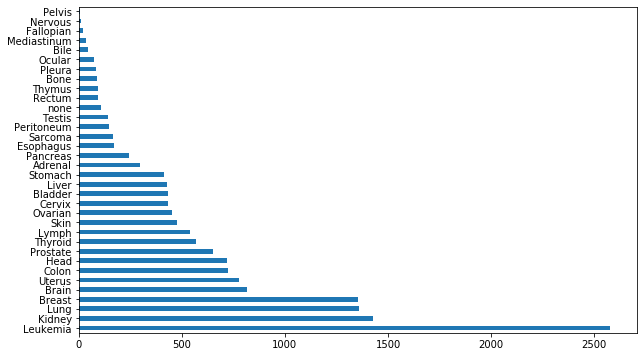

In [15]:
df['Y'].value_counts().plot(kind='barh', figsize = (10,6))

Looks like the dataset is extremely imbalanced. Might have to do do something for it. 

I tried to visualize these values as well.
Figure below shows the boxplots for two of these features.

(0, 250)

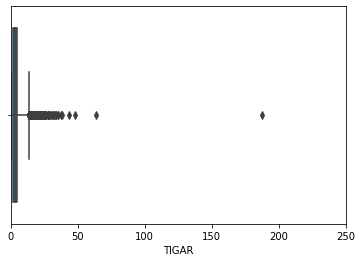

In [16]:
import seaborn as sns
sns.boxplot(df['TIGAR'], whis= 3)
plt.xlim(0, 250)

(0, 250)

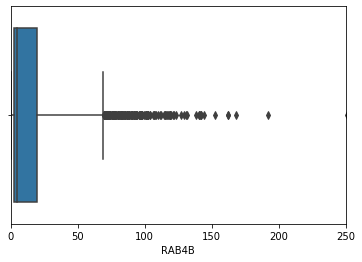

In [17]:
import seaborn as sns
sns.boxplot(df['RAB4B'], whis= 3)
plt.xlim(0, 250)

There are some outliers, but not sure we need to remove them for classifier to improve its robustness or use just as it is since this is Gene's data. 
Also since we are more concerned on the determination of classification, I'd say we can get away with this since it performed satisfactorily.

### Label Encoding the categorical variable Y

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()

df['Y'] = label_encoder.fit_transform(df['Y'])
df['Y'].head()

0    13
1    11
2    24
3    11
4    11
Name: Y, dtype: int64

In [19]:
print(len(label_encoder.classes_))
label_encoder.classes_

34


array(['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none'], dtype=object)

In [20]:
labels = df.pop("labels")
Y = df.pop("Y")

In [21]:
Y.head()

0    13
1    11
2    24
3    11
4    11
Name: Y, dtype: int64

### Converting Y into 1-hot

In [22]:
Y = keras.utils.to_categorical(Y)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [23]:
df.head() # X

,RAB4B,TIGAR,RNF44,DNAH3,RPL23A,ARL8B,CALB2,MFSD3,PIGV,ZNF708,...,SLCO4C1,ARHGAP21,DDX47,POMZP3,SDS,TENM1,CYP4F2,PPP6R1,BATF3,OR8D4
0,2.367912,0.698684,3.931116,0.000000,116.288461,13.839265,0.021383,14.722173,5.437620,0.124913,...,0.000000,1.199607,0.101155,1.428458,2.471339,0.042357,44.610061,6.394772,0.281878,0.0
1,26.299800,2.498500,0.255600,14.944300,2.049600,3.262300,0.146400,14.132900,3.323600,0.014800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,5.592506,2.953563,7.065690,0.012499,325.521932,22.144552,0.356845,28.899361,6.717593,1.759132,...,0.030674,2.062158,0.185503,8.414909,2.690346,0.688731,0.260365,9.792451,1.671371,0.0
3,21.554200,1.334700,1.095300,23.476800,8.741300,11.491700,0.945500,32.975700,6.187900,42.428300,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,22.820100,2.640900,3.750800,29.774900,7.595200,15.186900,0.482000,19.233800,8.741800,1.025000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


## Get the subset of FPKM and Gene's data

In [24]:
df.columns.shape, fpkm_df.columns.shape

((19102,), (29688,))

In [25]:
intersect_cols = np.intersect1d(df.columns, fpkm_df.columns)
print(intersect_cols.shape)

(16645,)


In [26]:
df = df[intersect_cols]
print(df.shape)
df.head()

(15965, 16645)


,A1BG,A1CF,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADACL3,AADACL4,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
0,9.590309,12.479927,0.000000,0.0000,1.620959,0.0000,11.202862,0.812310,0.0000,0.00000,...,3.115799,0.653368,3.123988,0.318739,0.512813,2.479865,0.038790,2.474220,32.734571,0.720153
1,2.025700,0.000000,0.082000,16.1707,0.049500,0.3176,0.000000,1.001800,0.2553,0.21080,...,0.000000,21.073500,0.110300,1.157100,0.246400,0.000000,0.176600,0.096900,0.000000,0.230700
2,0.046677,0.007302,0.384062,0.0000,20.283908,0.0000,12.500055,2.208952,0.0000,0.01484,...,5.733971,1.306286,2.182037,0.608059,2.248505,3.513787,0.363497,2.745613,71.281340,2.437730
3,4.007400,0.149100,0.628500,15.1556,0.347500,1.1154,0.000000,0.693600,0.5979,0.07050,...,0.000000,11.740800,0.654500,1.439300,7.710000,0.664300,5.375500,0.272300,0.000000,3.677500
4,6.315200,0.178500,1.724200,13.5937,0.069300,1.5579,0.000000,0.592200,1.0737,0.12660,...,0.000000,15.540800,2.350500,1.744900,4.988900,0.556700,1.732600,0.461800,0.000000,9.052900


### Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12772, 16645), (3193, 16645), (12772, 34), (3193, 34))

Faced MemoryError while standardizing this so doing these steps  
- reset df variable from memory
- save backup for splitted data

In [28]:
# Variables in memory that's hogging the memories greater than 1MB.
local_vars = list(locals().items())
for var, obj in local_vars:
    size = sys.getsizeof(obj)/1000
    if size > 1024:
        print(var, size/1024,"MB")

# df 2439707.544 KB # Evenif the memory was just 2.4GB, it was giving issues occassionally.
# labels 1075.379 KB
# X_train 1951868.152 KB
# X_test 487967.056 KB
# y_train 1737.104 KB


df 2076.073734375 MB
fpkm_df 30.6747001953125 MB
_11 10.1734609375 MB
_12 10.1732265625 MB
labels 1.0501748046875 MB
X_train 1660.9587109375 MB
X_test 415.2396953125 MB
y_train 1.696390625 MB


In [ ]:
%reset_selective -f "^df$"  # Releasing memory of df variable

### Feature Scaling 

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 
X_test.shape

MemoryError: 

In [32]:
filename = "../data/splitted_data_fpkm.npz"
# filename = "../data/splitted_data_X_train.npz"

In [33]:
np.savez_compressed(filename, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
print(f"{filename}Data saved..")

MemoryError: 

Load the splitted variables for next step.
Just Run this below to load them and start experimentation later.

In [ ]:
a = np.load(filename)

In [ ]:
X_train, X_test, y_train, y_test = a["X_train"], a["X_test"], a["y_train"], a["y_test"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### Model Definition

In [ ]:
model = Sequential()
model.add(Dense(1024, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(512, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['categorical_crossentropy','accuracy'])
model.summary()

## Training

In [1]:
checkpoint_path = "out/vanilla/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

NameError: name 'os' is not defined

In [ ]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    verbose=1, 
                    epochs=20, 
                    shuffle=True,
                    callbacks = [cp_callback])

### Validation with FPKM

In [ ]:
fpkm_X_test = fpkm_df[intersect_cols]

In [ ]:
predicted_labels = np.argmax(model.predict(fpkm_X_test), axis=1)

test_range = [:10]
print("Predicted labels: ", predicted_valid_labels[test_range])

predicts = label_encoder.inverse_transform(predicted_valid_labels[test_range])
print("FPKM Predictions:\n",predicts)

## Evaluating with Validation set

In [ ]:
predicted_valid_labels = np.argmax(model.predict(X_test), axis=1)
valid_labels = np.argmax(y_test, axis=1)

test_range = [:10]
print("Predicted labels: ", predicted_valid_labels[test_range])
print("True labels: ", valid_labels[test_range])

real = label_encoder.inverse_transform(valid_labels[test_range])
predicts = label_encoder.inverse_transform(predicted_valid_labels[test_range])
print("real:preds\n",[real[i]:predicts[i] for i in test_range])

In [ ]:
# Visualization of Confusion Matrix
import seaborn as sns

cm = metrics.confusion_matrix(valid_labels, predicted_valid_labels)
# print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20,20))
sns.heatmap(cm_normalized, annot=True, fmt=".4f", linewidths=.5, square = True, cmap = 'summer')
plt.xlabel('Predicted Values', size=20)
plt.ylabel('Actual Values', size=20)

ticks = np.arange(len(set(valid_labels)))
tick_marks = ['Adrenal', 'Bile', 'Bladder', 'Bone', 'Brain', 'Breast', 'Cervix',
       'Colon', 'Esophagus', 'Fallopian', 'Head', 'Kidney', 'Leukemia',
       'Liver', 'Lung', 'Lymph', 'Mediastinum', 'Nervous', 'Ocular',
       'Ovarian', 'Pancreas', 'Pelvis', 'Peritoneum', 'Pleura',
       'Prostate', 'Rectum', 'Sarcoma', 'Skin', 'Stomach', 'Testis',
       'Thymus', 'Thyroid', 'Uterus', 'none']

plt.xticks(ticks+0.5 ,tick_marks, rotation=90, size=12) #add 0.5 to ticks to position it at center
plt.yticks(ticks+0.5 ,tick_marks, rotation=0, size=12)
# all_sample_title = 'Accuracy Score: {:.4f}'.format(93) # hardcoded this from training logs for now :D
# plt.title(all_sample_title, size = 30)
plt.show()